# **Diabetes Prediction using Logistic Regression (Solution)**

Inspired by Dipanjan Sarkar et al. 2018. [Practical Machine Learning with Python](https://link.springer.com/book/10.1007/978-1-4842-3207-1).

## **Overview**
This notebook aims to develop a **logistic regression model** to predict whether a patient has diabetes based on medical measurements. We will perform **data preprocessing, model training, evaluation, and interpretability analysis** using **SHAP**.

The dataset used is the **Pima Indians Diabetes Dataset**, which contains medical diagnostic data such as glucose level, BMI, insulin levels, and age.

---

## **Learning Objectives**
By the end of this notebook, you will be able to:
- Load and preprocess a real-world medical dataset.
- Train and evaluate a **logistic regression classifier** for diabetes prediction.
- Analyze model performance using metrics such as **accuracy, precision, recall, and F1-score**.
- Visualize the **ROC curve** to assess the classifier’s ability to distinguish between diabetic and non-diabetic patients.
- Use **SHAP** to interpret model predictions and understand feature importance.
- Plot the **decision boundary** of the classifier to visualize how features contribute to predictions.

---

## **Tasks to Complete**
1. **Load and explore the dataset**
   - Read the dataset and check for missing values or inconsistencies.
   - Convert categorical labels into meaningful categories.

2. **Preprocess the data**
   - Standardize numerical features using **StandardScaler**.
   - Split the data into **training and test sets**.

3. **Train a logistic regression model**
   - Fit a logistic regression model to predict diabetes.
   - Evaluate the model using **classification metrics**.

4. **Interpret the model’s decisions**
   - Generate **SHAP summary plots** to understand feature importance.
   - Plot the **ROC curve** to assess model discrimination ability.

5. **Visualize decision boundaries**
   - Plot decision surfaces for **Glucose** and **BMI** to understand decision regions.

---

## **Prerequisites**
Before running this notebook, ensure you have the following:
- **Python 3.6+**
- Required libraries installed:
  ```bash
  pip install numpy pandas matplotlib seaborn shap scikit-learn lime


## Get Started

- Please select kernel "conda_tensorflow2_p310" from SageMaker notebook instance.

### Install required packages

In [1]:
# Magic command to install required Python packages using pip: numpy, pandas, matplotlib, seaborn, shap, scikit-learn, and lime.
%pip install numpy pandas matplotlib seaborn shap scikit-learn lime

Note: you may need to restart the kernel to use updated packages.


### Import necessary dependencies

In [2]:
# Imports the matplotlib.pyplot module for plotting and visualization, aliased as plt.
import matplotlib.pyplot as plt

# Imports the numpy library for numerical operations, especially for arrays and matrices, aliased as np.
import numpy as np

# Imports the pandas library for data manipulation and analysis, particularly using DataFrames, aliased as pd.
import pandas as pd

# Imports the read_csv function from pandas to read CSV files into DataFrames.
from pandas import read_csv

# Imports the shap library for explaining the output of machine learning models.
import shap

# Imports the lime library for explaining individual predictions of machine learning models.
import lime

# Imports the lime_tabular module from the lime library, specifically for tabular data explanation.
import lime.lime_tabular

# Imports the Counter class from the collections module to count hashable objects.
from collections import Counter

# Imports the metrics module from scikit-learn for evaluating model performance.
from sklearn import metrics

# Imports the clone function from scikit-learn.base to create copies of estimators.
from sklearn.base import clone

# Imports the LogisticRegression class from scikit-learn.linear_model for logistic regression models.
from sklearn.linear_model import LogisticRegression

# Imports the auc and roc_curve functions from scikit-learn.metrics for ROC curve analysis.
from sklearn.metrics import auc, roc_curve

# Imports the train_test_split function from scikit-learn.model_selection to split data into training and testing sets.
from sklearn.model_selection import train_test_split

# Imports LabelEncoder and StandardScaler from scikit-learn.preprocessing for data preprocessing tasks like label encoding and standardization.
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize

# Set up plotting style
# plt.style.use("seaborn-whitegrid")
# Magic command for Jupyter/IPython to display matplotlib plots inline within the notebook.
%matplotlib inline

# Pima Indians Diabetes Dataset

## Overview
The **Pima Indians Diabetes Dataset** is a well-known dataset used for binary classification tasks in machine learning, specifically for predicting whether a patient has diabetes based on various medical attributes. The dataset originates from the **National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK)** and focuses on female patients of **Pima Indian heritage**.

## Source
- **Dataset Repository:** [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/12/pima+indians+diabetes)
- **Original Source:** National Institute of Diabetes and Digestive and Kidney Diseases
- **Purpose:** Predicting the onset of diabetes based on diagnostic measurements.

## Dataset Description
The dataset contains **768 samples** with **8 numerical features** and **1 binary target variable** (diabetes outcome).

### **Features:**
1. **Pregnancies** – Number of times pregnant  
2. **Glucose** – Plasma glucose concentration over 2 hours in an oral glucose tolerance test  
3. **BloodPressure** – Diastolic blood pressure (mm Hg)  
4. **SkinThickness** – Triceps skinfold thickness (mm)  
5. **Insulin** – 2-Hour serum insulin (mu U/ml)  
6. **BMI** – Body mass index (weight in kg/(height in m²))  
7. **DiabetesPedigreeFunction** – Diabetes pedigree function (genetic influence)  
8. **Age** – Age of the patient (years)  
9. **Outcome** – Binary classification (1 = Diabetic, 0 = Non-Diabetic)  

## Summary Statistics
- **Total samples:** 768  
- **Diabetes positive cases (Outcome = 1):** ~35%  
- **Diabetes negative cases (Outcome = 0):** ~65%  
- **Missing values:** Some attributes contain zero values which may indicate missing data (e.g., Glucose, BloodPressure).

## Example Usage
This dataset is frequently used in **machine learning** and **statistical modeling** for:
- Logistic Regression
- Decision Trees & Random Forests
- Support Vector Machines (SVM)
- Deep Learning
- Feature Engineering and Imputation Techniques

## References
- UCI Machine Learning Repository: [Pima Indians Diabetes Dataset](https://archive.ics.uci.edu/dataset/12/pima+indians+diabetes)
- Smith, J. W., et al. "Using the ADAP learning algorithm to forecast the onset of diabetes mellitus." In Proceedings of the Annual Symposium on Computer Application in Medical Care. American Medical Informatics Association, 1988.

### Load pima-indians-diabetes dataset

In [3]:
# Load pima-indians-diabetes dataset with the correct structure
# Specify the file path to the dataset
diabetes_data = "../../Data/pima-indians-diabetes.csv"

# Define column names for the dataset based on pima-indians-diabetes.names
# The 'Outcome' column is the target variable (class), indicating diabetes (1) or no diabetes (0)
columns = [
    'Pregnancies',              # Number of times pregnant
    'Glucose',                  # Plasma glucose concentration (2 hours in an oral glucose tolerance test)
    'BloodPressure',            # Diastolic blood pressure (mm Hg)
    'SkinThickness',            # Triceps skinfold thickness (mm)
    'Insulin',                  # 2-Hour serum insulin (mu U/ml)
    'BMI',                      # Body mass index (weight in kg / (height in m)^2)
    'DiabetesPedigreeFunction', # Diabetes pedigree function (a genetic risk score)
    'Age',                      # Age in years
    'Outcome'                   # Target variable: 1 = diabetes, 0 = no diabetes
]

# Load the dataset using pandas' read_csv function
# Parameters:
# - diabetes_data: Path to the CSV file
# - header=None: The file has no header row
# - names=columns: Use the defined column names
# - na_values="?": Treat "?" as missing values
# - sep=',': The file is comma-separated
df = read_csv(
    diabetes_data,
    header=None,
    names=columns,
    na_values="?",
    sep=','
)

### Understand dataset features and values

In [4]:
# Converts numerical 'Outcome' column to categorical 'outcome' column with string labels for better readability.
df['outcome'] = df['Outcome'].map({0: 'non-diabetic', 1: 'diabetic'})

# Creates a new column 'outcome_numeric' with explicitly numerical labels for model training (non-diabetic: 0, diabetic: 1).
df['outcome_numeric'] = df['outcome'].map({'non-diabetic': 0, 'diabetic': 1})

# Assigns the 'outcome_numeric' column to the variable 'labels_numeric' to be used as numerical labels for training.
labels_numeric = df['outcome_numeric'] # Use numerical labels for training

# Create age groups
# Defines bins for age groups, used to categorize patients by age ranges.
bins = [20, 30, 40, 50, 60, 100]

# Defines labels for each age group bin, providing descriptive names for the age categories.
labels = ['20-29', '30-39', '40-49', '50-59', '60+']

# Creates a new column 'age_group' by categorizing the 'Age' column into the defined age bins and assigning corresponding labels.
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Prints the shape of the DataFrame (number of rows and columns).
print(df.shape)

# Prints a concise summary of the DataFrame, including data types and non-null values.
print(df.info())

# Displays the first few rows of the DataFrame to visually inspect the data and column structure.
df.head()

(768, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    int64   
 9   outcome                   768 non-null    object  
 10  outcome_numeric           768 non-null    int64   
 11  age_group                 768 non-null    category
dtypes: category(1), float64(2), int64(8), object(1)
memory usage: 67.1+ KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,outcome,outcome_numeric,age_group
0,6,148,72,35,0,33.6,0.627,50,1,diabetic,1,40-49
1,1,85,66,29,0,26.6,0.351,31,0,non-diabetic,0,30-39
2,8,183,64,0,0,23.3,0.672,32,1,diabetic,1,30-39
3,1,89,66,23,94,28.1,0.167,21,0,non-diabetic,0,20-29
4,0,137,40,35,168,43.1,2.288,33,1,diabetic,1,30-39


## Domain Knowledge

### Key Health Indicators

- **Pregnancies:** Number of times pregnant
- **Glucose:** Plasma glucose concentration (mg/dL)
- **BloodPressure:** Diastolic blood pressure (mm Hg)
- **SkinThickness:** Triceps skin fold thickness (mm)
- **Insulin:** 2-Hour serum insulin (mu U/ml)
- **BMI:** Body mass index (kg/m²)
- **DiabetesPedigreeFunction:** Diabetes risk genetic score
- **Age:** Years
- **Outcome:** Diabetes diagnosis (0 = Negative, 1 = Positive)

### Define helper functions for model evaluation

In [5]:
# Computes accuracy, precision, recall, and F1 score.
# Defines a function called 'get_metrics' that takes true labels and predicted labels as input.
def get_metrics(true_labels, predicted_labels):
    """Calculate and print accuracy, precision, recall, and F1 score."""
    # Prints the accuracy score, rounded to 4 decimal places, by comparing true and predicted labels.
    print("Accuracy:", np.round(metrics.accuracy_score(true_labels, predicted_labels), 4))
    
    # Prints the precision score, rounded to 4 decimal places, using weighted average for multi-class, comparing true and predicted labels.
    print("Precision:", np.round(metrics.precision_score(true_labels, predicted_labels, average="weighted"), 4))
    
    # Prints the recall score, rounded to 4 decimal places, using weighted average for multi-class, comparing true and predicted labels.
    print("Recall:", np.round(metrics.recall_score(true_labels, predicted_labels, average="weighted"), 4))
    
    # Prints the F1 score, rounded to 4 decimal places, using weighted average for multi-class, comparing true and predicted labels.
    print("F1 Score:", np.round(metrics.f1_score(true_labels, predicted_labels, average="weighted"), 4))

# Defines a function called 'display_classification_report' that takes true labels, predicted labels, and class names as input.
def display_classification_report(true_labels, predicted_labels, classes):
    # Docstring explaining the function's purpose: "Display a detailed classification report."
    """Display a detailed classification report."""
    # Generates a classification report using scikit-learn's metrics.classification_report, including precision, recall, F1-score, and support.
    report = metrics.classification_report(true_labels, predicted_labels, labels=classes)
    
    # Prints the generated classification report to the console.
    print(report)

# Defines a function to display a confusion matrix.
def display_confusion_matrix(true_labels, predicted_labels, classes):
    """Display a confusion matrix."""
    # Calculates the confusion matrix using true labels and predicted labels, specifying the order of classes.
    cm = metrics.confusion_matrix(true_labels, predicted_labels, labels=classes)
    
    # Creates a Pandas DataFrame from the confusion matrix, using class names for index and columns.
    cm_frame = pd.DataFrame(cm, index=classes, columns=classes)
    
    # Prints the title "Confusion Matrix:".
    print("Confusion Matrix:")
    
    # Prints the confusion matrix DataFrame.
    print(cm_frame)

# Combines the above functions to display overall model performance.
# Defines a function called 'display_model_performance_metrics' that takes true labels, predicted labels, and class names as input.
def display_model_performance_metrics(true_labels, predicted_labels, classes):
    """Display model performance metrics."""
    # Prints a title "Model Performance Metrics:" to indicate the start of the metrics display.
    print("Model Performance Metrics:")
    
    # Prints a separator line of 30 hyphens for visual clarity.
    print("-" * 30)
    
    # Calls the 'get_metrics' function to calculate and print accuracy, precision, recall, and F1 score.
    get_metrics(true_labels, predicted_labels)
    
    # Prints a newline character to create spacing before the classification report.
    print("\nClassification Report:")
    
    # Prints another separator line of 30 hyphens for visual clarity.
    print("-" * 30)
    
    # Calls the 'display_classification_report' function to print a detailed classification report.
    display_classification_report(true_labels, predicted_labels, classes)
    
    # Prints a newline character to create spacing before the confusion matrix.
    print("\nConfusion Matrix:")
    
    # Prints another separator line of 30 hyphens for visual clarity.
    print("-" * 30)
    
    # Calls the 'display_confusion_matrix' function to print the confusion matrix.
    display_confusion_matrix(true_labels, predicted_labels, classes)

# Plots the ROC curve and calculates the AUC (Area Under the Curve).
# Defines a function to plot the ROC curve for a given classifier.
def plot_model_roc_curve(clf, features, true_labels, class_names):
    """Plot ROC curve for the model."""
    # Binarizes the true labels to be compatible with ROC curve calculation, handling multiple classes if present.
    y_test = label_binarize(true_labels, classes=class_names)
    
    # Checks if the classifier 'clf' has a 'predict_proba' method (for probabilistic classifiers).
    if hasattr(clf, "predict_proba"):
        # If 'predict_proba' exists, use it to get probability scores for each class.
        y_score = clf.predict_proba(features)
        
    # If 'predict_proba' does not exist (for non-probabilistic classifiers).
    else:
        # Use 'decision_function' to get decision scores (fallback for ROC curve calculation).
        y_score = clf.decision_function(features)

    # Calculates the False Positive Rate (fpr), True Positive Rate (tpr), and thresholds for the ROC curve.
    fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
    
    # Calculates the Area Under the ROC Curve (AUC) using the calculated fpr and tpr.
    roc_auc = auc(fpr, tpr)

    # Create a new figure with a specified size (8 inches wide, 6 inches tall)
    plt.figure(figsize=(8, 6))
    
    # Plot the ROC curve:
    # - fpr: False Positive Rate (x-axis)
    # - tpr: True Positive Rate (y-axis)
    # - Label the curve with the AUC (Area Under the Curve) value, formatted to 2 decimal places
    # - Set the line width to 2 for better visibility
    plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})", linewidth=2)
    
    # Plot the diagonal dashed line (representing a random classifier):
    # - [0, 1] and [0, 1] define the start and end points of the line
    # - "k--" specifies a black dashed line
    # - Set the line width to 2 for consistency
    plt.plot([0, 1], [0, 1], "k--", linewidth=2)
    
    # Set the x-axis limits to range from 0.0 to 1.0
    plt.xlim([0.0, 1.0])
    
    # Set the y-axis limits to range from 0.0 to 1.05 (slightly above 1.0 for better visualization)
    plt.ylim([0.0, 1.05])
    
    # Label the x-axis as "False Positive Rate"
    plt.xlabel("False Positive Rate")
    
    # Label the y-axis as "True Positive Rate"
    plt.ylabel("True Positive Rate")
    
    # Set the title of the plot to "Receiver Operating Characteristic (ROC) Curve"
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    
    # Add a legend to the plot, positioned in the lower right corner
    plt.legend(loc="lower right")
    
    # Display the plot
    plt.show()

# Visualizes the decision boundary of a model for two features.
# Defines a function to plot the decision surface of a classifier.
def plot_model_decision_surface(
    clf, # Classifier object (e.g., LogisticRegression) to plot decision surface for.
    train_features, # Training features (NumPy array or DataFrame) - should have exactly 2 columns.
    train_labels, # Training labels (NumPy array or Series) corresponding to train_features.
    plot_step=0.02, # Step size for creating the meshgrid for the plot.
    cmap=plt.cm.RdYlBu, # Colormap to use for filling the contour plot regions.
    markers=None, # List of markers to use for each class in the scatter plot.
    alphas=None, # List of alpha values for each class in the scatter plot.
    colors=None, # List of colors to use for each class in the scatter plot.
):
    # Checks if the input training features have exactly 2 columns, raises ValueError if not.
    if train_features.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columnns!")

    # Calculate minimum and maximum values for the first feature (x-axis) and add plot_step margin.
    x_min, x_max = (
        train_features[:, 0].min() - plot_step,
        train_features[:, 0].max() + plot_step,
    )
    
    # Calculate minimum and maximum values for the second feature (y-axis) and add plot_step margin.
    y_min, y_max = (
        train_features[:, 1].min() - plot_step,
        train_features[:, 1].max() + plot_step,
    )
    
    # Create a meshgrid of points using numpy.arange for x and y ranges with plot_step intervals.
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )

    # Create a clone of the classifier to avoid modifying the original classifier.
    clf_est = clone(clf)
    
    # Fit the cloned classifier on the provided training features and labels.
    clf_est.fit(train_features, train_labels)
    
    # Checks if the classifier has a 'predict_proba' method (for probability estimates).
    if hasattr(clf_est, "predict_proba"):
        # Predict probabilities for each point in the meshgrid using the fitted classifier, taking probability of the positive class ([:, 1]).
        Z = clf_est.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        
    # If 'predict_proba' is not available, use 'predict' for class labels directly.
    else:
        # Predict class labels for each point in the meshgrid using the fitted classifier.
        Z = clf_est.predict(np.c_[xx.ravel(), yy.ravel()])
        
    # Reshape the prediction results 'Z' to match the shape of the meshgrid 'xx'.
    Z = Z.reshape(xx.shape)
    
    # Create a filled contour plot (decision surface) using matplotlib, with colors based on 'Z' and colormap 'cmap'.
    cs = plt.contourf(xx, yy, Z, cmap=cmap)

    # Initialize LabelEncoder to encode string labels to numerical values.
    le = LabelEncoder()
    
    # Fit and transform the training labels to numerical encoded labels.
    y_enc = le.fit_transform(train_labels)
    
    # Determine the number of classes from the LabelEncoder.
    n_classes = len(le.classes_)
    
    # Use provided colors or default to None, joining colors into a string if provided.
    plot_colors = "".join(colors) if colors else [None] * n_classes
    
    # Get the class names from the LabelEncoder.
    label_names = le.classes_
    
    # Use provided markers or default to None.
    markers = markers if markers else [None] * n_classes
    
    # Use provided alpha values or default to None.
    alphas = alphas if alphas else [None] * n_classes
    
    # Iterate through each class index and color.
    for i, color in zip(range(n_classes), plot_colors):
        # Find indices of data points belonging to the current class.
        idx = np.where(y_enc == i)
        
        # Create a scatter plot for each class, using features from train_features, color, label, edge color, marker, and alpha.
        plt.scatter(
            train_features[idx, 0],
            train_features[idx, 1],
            c=[color] * len(idx[0]),  # Ensure color mapping
            label=label_names[i],
            edgecolors="black",
            marker=markers[i],
            alpha=alphas[i],
        )
    # Display the legend to identify classes in the scatter plot.
    plt.legend()
    
    # Show the plot.
    plt.show()

### Prepare Features and Labels

In [6]:
# Prepare features and labels
# Features are prepared by dropping non-feature columns (Outcome, outcome, age_group).
features = df.drop(columns=['Outcome', 'outcome', 'age_group', 'outcome_numeric'])  # Drop non-feature columns
feature_names = features.columns

# Labels are set as the categorical outcome column.
labels = df['outcome']  # Use the categorical outcome column

# The data is split into training and testing sets using an 70-30 split.
train_X, test_X, train_y, test_y = train_test_split(features, labels_numeric, test_size=0.3, random_state=42) # Use labels_numeric here

print("Train Class Distribution:", Counter(train_y))
print("Test Class Distribution:", Counter(test_y))
print("Features:", list(feature_names))

Train Class Distribution: Counter({0: 349, 1: 188})
Test Class Distribution: Counter({0: 151, 1: 80})
Features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


### Standardize the data

In [7]:
# The features are standardized using StandardScaler to ensure all features are on the same scale.
# Initializes StandardScaler and fits it to the training feature data (train_X) to learn scaling parameters (mean and std).
scaler = StandardScaler().fit(train_X)

# Transforms the training feature data (train_X) using the fitted scaler to standardize it (mean=0, std=1), storing the result in train_SX.
train_SX = scaler.transform(train_X)

# Transforms the testing feature data (test_X) using the SAME fitted scaler to standardize it, ensuring consistent scaling with training data, storing the result in test_SX.
test_SX = scaler.transform(test_X)

In [8]:
# Train the model
# Initializes a Logistic Regression model from scikit-learn.
model = LogisticRegression()

# Trains the Logistic Regression model using the standardized training features (train_SX) and training labels (train_y).
model.fit(train_SX, train_y)

# Prints the class labels that the model has been trained to predict, useful for understanding class order.
print("Model Classes:", model.classes_) # Check the order of classes

Model Classes: [0 1]


### Evaluate Model Performance

In [9]:
# Predictions are made on the test set using the trained logistic regression model.
predictions = model.predict(test_SX)

# Model performance is evaluated and printed to console.
# Prints a header indicating the start of model performance metrics.
print("Model Performance:")

# Prints the classification report, including precision, recall, F1-score, and support for each class, using true test labels and model predictions.
print(metrics.classification_report(test_y, predictions))

Model Performance:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



The model is doing a decent job overall (74% accuracy) at predicting diabetes. However, it's better at identifying non-diabetic patients than diabetic patients. When it predicts someone is diabetic, it's correct about 62% of the time, and it only correctly identifies about 62% of all the truly diabetic patients in your test data.  For non-diabetic patients, it's more accurate and finds a larger proportion of them.

### Interpret the Model
#### SHAP summary plot

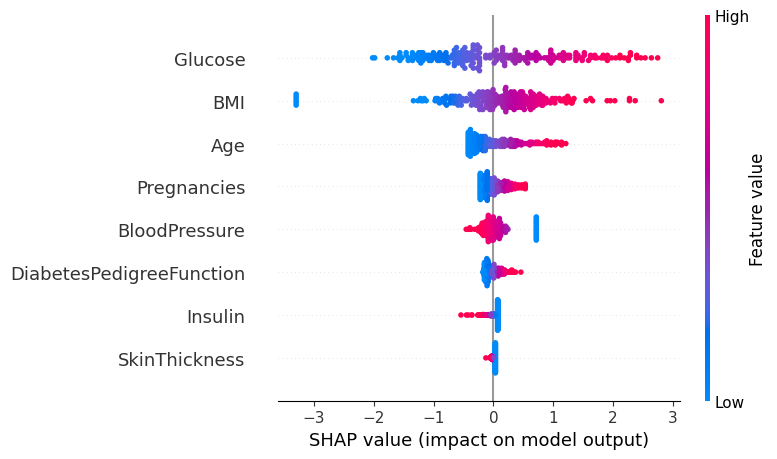

In [10]:
# SHAP (SHapley Additive exPlanations) is used to explain the model's predictions by calculating feature importance and visualizing it using a summary plot.
# Creates a SHAP explainer object for the logistic regression model, using the scaled training features as background data.
explainer = shap.Explainer(model, train_SX)

# Calculates SHAP values for the test dataset using the explainer.
shap_values = explainer(test_SX)

# Generates a SHAP summary plot to visualize feature importance and their impact on model output, passing class names for clarity.
shap.summary_plot(shap_values, test_SX, feature_names=feature_names, class_names=model.classes_) # Pass class_names to summary_plot

**SHAP Summary Plot Interpretation:**

This SHAP summary plot shows the relationships between the features and the diabetes prediction model.  

Here's a breakdown of feature importance and their impact:

*   **Glucose:** *Most important feature*. Higher glucose levels strongly **increase** the model's prediction of diabetes (red dots on the right). Lower glucose levels decrease the prediction (blue dots on the left).

*   **BMI (Body Mass Index):** *Second most important*. Higher BMI values **increase** the likelihood of a "diabetic" prediction (red dots on the right). Lower BMI values decrease the prediction (blue dots on the left).

*   **Age:** *Positive impact on diabetes prediction*. Older age tends to **increase** the prediction of diabetes (redder dots slightly on the right).

*   **DiabetesPedigreeFunction:** *Positive influence*. Higher DiabetesPedigreeFunction (family history) **increases** the diabetes prediction (red dots shifted to the right).

*   **Pregnancies:** *Weak positive association*. Higher number of pregnancies might have a slight tendency to **increase** diabetes prediction, but the effect is less clear and more mixed.

*   **BloodPressure:** *Weak and mixed impact*.  BloodPressure has a less strong and less consistent impact, with a slight tendency for higher blood pressure to weakly **increase** diabetes prediction.

*   **Insulin & SkinThickness:** *Weakest impact*. These features appear to be the least influential in this model for diabetes prediction, showing minimal and inconsistent effects.

**Key Takeaway:**

The SHAP plot now provides a much more **sensible and clinically plausible interpretation** of the logistic regression model's behavior for diabetes prediction. The model now highlights Glucose and BMI as dominant risk factors, with Age and family history also contributing in the positive direction.

#### Plots the ROC curve and calculates the AUC (Area Under the Curve).

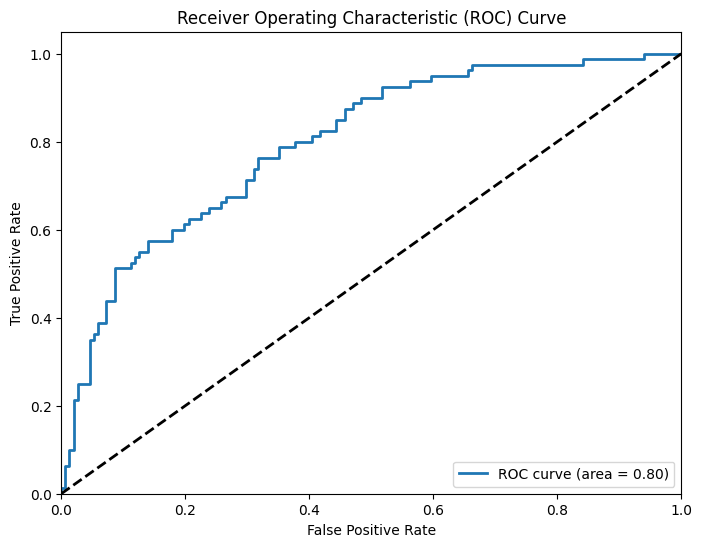

In [11]:
# Calls the function 'plot_model_roc_curve' to generate and display the ROC curve.
plot_model_roc_curve(
    # Specifies the trained machine learning model (Logistic Regression).
    model,
    # Specifies the standardized features of the test dataset.
    test_SX,
    # Specifies the true labels for the test dataset.
    test_y,
    # Passes the class names from the trained model to be used in the ROC curve plot.
    class_names=model.classes_
)

**Interpretation of the ROC Curve (AUC = 0.80)**

The **Receiver Operating Characteristic (ROC) curve** is a visual tool to evaluate the performance of a binary classification model, showing the trade-off between the True Positive Rate (TPR) and False Positive Rate (FPR) at different thresholds.

**Key Components:**

*   **X-axis: False Positive Rate (FPR)**:  The proportion of actual non-diabetic patients incorrectly predicted as diabetic. Lower is better.
*   **Y-axis: True Positive Rate (TPR)**: The proportion of actual diabetic patients correctly predicted as diabetic (Sensitivity/Recall). Higher is better.
*   **Diagonal Dashed Line**: Represents a random classifier (no discriminatory ability).
*   **Blue Curve (Model's ROC Curve)**: Shows the performance of the Logistic Regression model. The further the curve is towards the top-left corner, the better the model.
*   **AUC (Area Under the Curve) = 0.80**: A single value summarizing the overall performance.

**Interpreting the ROC Curve and AUC = 0.80:**

*   **Curve Shape**: The blue curve is significantly above the diagonal line, indicating the model performs **much better than random guessing**. It demonstrates a good ability to distinguish between diabetic and non-diabetic patients.
*   **AUC Value**:  An AUC of **0.80 is considered excellent discrimination**.  It suggests that there's an 80% chance the model can correctly differentiate between a randomly selected diabetic and non-diabetic patient.
*   **Trade-off**: The curve illustrates the balance between TPR and FPR. Moving right on the curve (higher FPR) increases TPR. The optimal threshold depends on the desired balance between minimizing false positives vs. false negatives for the specific application.

**Overall Model Performance:**

The ROC curve and AUC of 0.80 indicate that the Logistic Regression model exhibits **good to excellent performance** in classifying diabetes risk based on the provided features. It demonstrates a strong ability to discriminate between diabetic and non-diabetic patients within the test dataset.

### Plot decision surface for Glucose and BMI

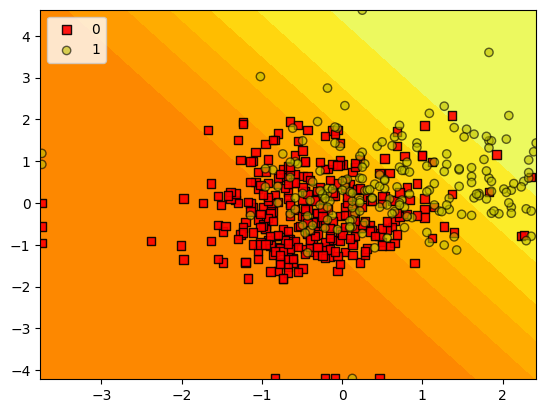

In [12]:
# The decision surface for two specific features (Glucose and BMI) is plotted to visualize how the model separates the classes.
# Define a list to store the indices of the features 'Glucose' and 'BMI'.
feature_indices = [
    # Iterate through the feature names along with their indices.
    i
    # 'enumerate(feature_names)' generates pairs of (index, feature_name).
    for i, feature in enumerate(feature_names)
    # Check if the current 'feature' is either "Glucose" or "BMI".
    if feature in ["Glucose", "BMI"]
]
# Call the function 'plot_model_decision_surface' to visualize the decision boundary.
plot_model_decision_surface(
    # Pass the trained Logistic Regression model 'model' to the function.
    clf=model,
    # Select the standardized training features corresponding to 'Glucose' and 'BMI' using 'feature_indices'.
    train_features=train_SX[:, feature_indices],
    # Pass the training labels 'train_y' to the function.
    train_labels=train_y,
    # Set the step size for creating the meshgrid for the decision surface plot.
    plot_step=0.02,
    # Choose the colormap 'Wistia_r' for the decision surface plot.
    cmap=plt.cm.Wistia_r,
    # Define markers for the scatter plot points representing different classes.
    markers=[",", "o"],
    # Set alpha transparency values for the scatter plot points.
    alphas=[0.9, 0.6],
    # Define colors for the scatter plot points representing different classes.
    colors=["r", "y"],
)

**Interpretation of the Decision Surface for Glucose and BMI**

This plot visualizes the **decision surface** of the Logistic Regression model when using only **Glucose** and **BMI** as predictor features for diabetes. It shows how the model separates the feature space into regions associated with 'non-diabetic' (Class 0) and 'diabetic' (Class 1) predictions.

**Key Components:**

*   **X-axis: Glucose**: Represents the standardized Glucose level.
*   **Y-axis: BMI**: Represents the standardized Body Mass Index.
*   **Background Colors**:
    *   **Yellow Region (Upper Right)**:  Represents the decision region where the model predicts **'diabetic' (Class 1)**.  Any data point falling in this yellow area would be classified as diabetic by the model.
    *   **Orange/Red Region (Lower Left)**: Represents the decision region where the model predicts **'non-diabetic' (Class 0)**. Data points in this area would be classified as non-diabetic.
    *   **Color Gradient**: The gradual change in color from orange to yellow visually represents the probability gradient.  Areas closer to yellow have a higher probability of being classified as 'diabetic', while areas closer to orange have a higher probability of being 'non-diabetic'.
*   **Markers**:
    *   **Red Squares**: Represent the actual data points from the **'non-diabetic' (Class 0)** training set.
    *   **Yellow Circles**: Represent the actual data points from the **'diabetic' (Class 1)** training set.

**Decision Boundary:**

*   The **boundary** between the orange/red and yellow regions is the **decision boundary** of the Logistic Regression model.  It's approximately a straight, diagonal line running from the top-left to the bottom-right of the plot.
*   This line represents where the model is **50% confident** in predicting either class. On one side of the line, the probability of 'diabetic' is greater than 50%, and on the other side, it's less than 50%.

**Interpreting the Decision Surface:**

*   **Glucose and BMI as Predictors**: The plot clearly shows how Glucose and BMI together influence the model's diabetes predictions.
*   **Higher Glucose and BMI = 'Diabetic' Prediction**:  As you move towards the **upper-right** of the plot (increasing both Glucose and BMI), you enter the yellow 'diabetic' prediction region. This visually confirms that **higher Glucose and higher BMI values increase the likelihood of the model predicting diabetes.** This aligns with medical understanding of diabetes risk factors.
*   **Lower Glucose and BMI = 'Non-Diabetic' Prediction**: Conversely, as you move towards the **lower-left** (decreasing both Glucose and BMI), you are in the orange/red 'non-diabetic' region. **Lower Glucose and BMI values decrease the likelihood of a 'diabetic' prediction.**
*   **Linear Decision Boundary**: The straight line decision boundary is characteristic of Logistic Regression. It indicates that the model is learning a linear relationship between the log-odds of diabetes and the combination of Glucose and BMI.
*   **Data Point Distribution**: You can observe how the actual data points (squares and circles) are distributed relative to the decision boundary. There is some overlap, especially in the middle, which is expected in real-world datasets.  The model is trying to find the best linear separation possible.

**In Summary:**

The decision surface plot effectively visualizes how your Logistic Regression model uses Glucose and BMI to predict diabetes. It demonstrates that the model learns to associate higher Glucose and BMI values with a higher probability of diabetes, and vice versa, using a linear decision boundary to separate the two classes in the Glucose-BMI feature space. This plot provides an intuitive understanding of the model's decision-making process based on these two important features.

### Prediction using new patients

In [13]:
# 1. Create new sample data (replace with your desired sample data)
new_samples_data = {
    'Sample1': {'Pregnancies': 2, 'Glucose': 100, 'BloodPressure': 70, 'SkinThickness': 25, 'Insulin': 50, 'BMI': 30.0, 'DiabetesPedigreeFunction': 0.5, 'Age': 35},
    'Sample2': {'Pregnancies': 8, 'Glucose': 180, 'BloodPressure': 90, 'SkinThickness': 35, 'Insulin': 100, 'BMI': 40.0, 'DiabetesPedigreeFunction': 1.0, 'Age': 50}
}
new_samples_df = pd.DataFrame.from_dict(new_samples_data, orient='index')

# 2. Preprocess the new samples using the SAME scaler fitted on training data
new_samples_scaled = scaler.transform(new_samples_df)

# 3. Make predictions
new_predictions = model.predict(new_samples_scaled)
new_probabilities = model.predict_proba(new_samples_scaled) # Get probabilities

# 4. Display the predictions
print("\n--- Predictions for New Samples ---")
for i, sample_name in enumerate(new_samples_data.keys()):
    prediction = new_predictions[i]
    probability_non_diabetic = new_probabilities[i][0] * 100 # Probability for 'non-diabetic' class
    probability_diabetic = new_probabilities[i][1] * 100    # Probability for 'diabetic' class
    print(f"Sample: {sample_name}")
    print(f"  Predicted Outcome: {prediction}")
    print(f"  Probability (non-diabetic): {probability_non_diabetic:.2f}%")
    print(f"  Probability (diabetic): {probability_diabetic:.2f}%")
    print("-" * 30)


--- Predictions for New Samples ---
Sample: Sample1
  Predicted Outcome: 0
  Probability (non-diabetic): 86.10%
  Probability (diabetic): 13.90%
------------------------------
Sample: Sample2
  Predicted Outcome: 1
  Probability (non-diabetic): 5.37%
  Probability (diabetic): 94.63%
------------------------------


## Conclusion

Through this module, we've learned how to:

- Develop model that predicts diabetes risk using logistic regression.
- Apply feature scaling to improve performance.
- Confirm model accuracy using evaluation metrics .
- Use SHAP to understand feature importance.
- Use visualization techniques (ROC curve, decision boundary) to gain insights.

## Clean up

Remember to:

- Save any generated plots and analysis results
- Clear notebook output if sharing
- Close dataset files